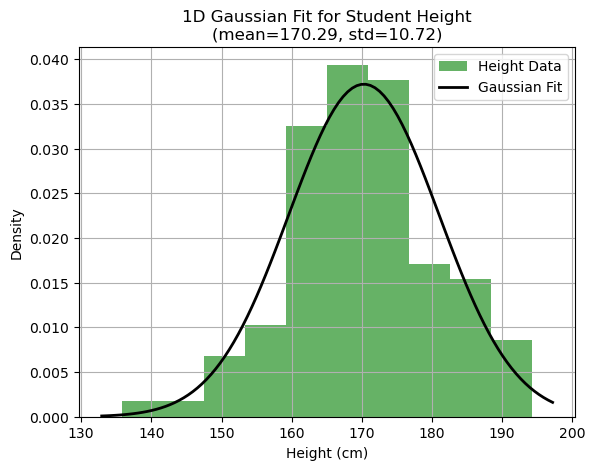

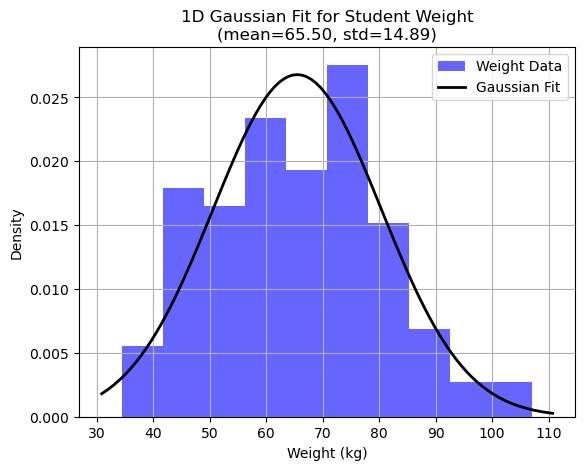

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Regenerate the same realistic student data
mean = [170, 65]  # Mean height = 170cm, Mean weight = 65kg
cov = [[100, 75],  # Covariance matrix
       [75, 225]]
data = np.random.multivariate_normal(mean, cov, 100)
height = data[:, 0]
weight = data[:, 1]

# --- Plot 1D Gaussian for Height ---

# Calculate mean and standard deviation for height
mu_height, std_height = norm.fit(height)

# Create a figure and axes for the plot
fig1, ax1 = plt.subplots()

# Plot the histogram of the height data
ax1.hist(height, bins=10, density=True, alpha=0.6, color='g', label='Height Data')

# Plot the PDF (Probability Density Function) for the fitted Gaussian
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_height, std_height)
ax1.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

# Add titles and labels
title = f"1D Gaussian Fit for Student Height\n(mean={mu_height:.2f}, std={std_height:.2f})"
ax1.set_title(title)
ax1.set_xlabel("Height (cm)")
ax1.set_ylabel("Density")
ax1.legend()
ax1.grid(True)

# Show the plot
plt.show()


# --- Plot 1D Gaussian for Weight ---

# Calculate mean and standard deviation for weight
mu_weight, std_weight = norm.fit(weight)

# Create a new figure and axes
fig2, ax2 = plt.subplots()

# Plot the histogram of the weight data
ax2.hist(weight, bins=10, density=True, alpha=0.6, color='b', label='Weight Data')

# Plot the PDF for the fitted Gaussian
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_weight, std_weight)
ax2.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

# Add titles and labels
title = f"1D Gaussian Fit for Student Weight\n(mean={mu_weight:.2f}, std={std_weight:.2f})"
ax2.set_title(title)
ax2.set_xlabel("Weight (kg)")
ax2.set_ylabel("Density")
ax2.legend()
ax2.grid(True)

# Show the plot
plt.show()

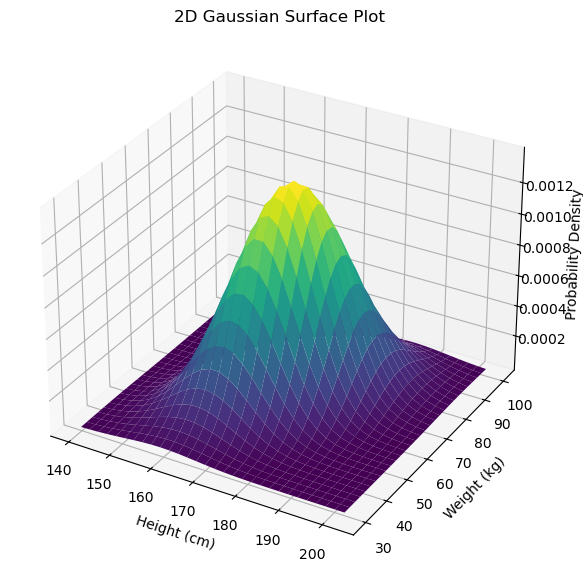

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# 1. Regenerate the same realistic student data
mean = [170, 65]  # Mean height, Mean weight
cov = [[100, 75], [75, 225]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, 100)
height = data[:, 0]
weight = data[:, 1]

# --- 1. Surface Plot ---

# Calculate the mean and covariance from the data
sample_mean = np.mean(data, axis=0)
sample_cov = np.cov(data, rowvar=False)

# Create a grid for the plot
x = np.linspace(height.min() - 5, height.max() + 5, 30)
y = np.linspace(weight.min() - 5, weight.max() + 5, 30)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Create the multivariate normal distribution (2D Gaussian)
rv = multivariate_normal(sample_mean, sample_cov)

# Evaluate the PDF on the grid
Z = rv.pdf(pos)

# Create a new figure and 3D axes for the surface plot
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title("2D Gaussian Surface Plot")
ax1.set_xlabel("Height (cm)")
ax1.set_ylabel("Weight (kg)")
ax1.set_zlabel("Probability Density")
plt.show()

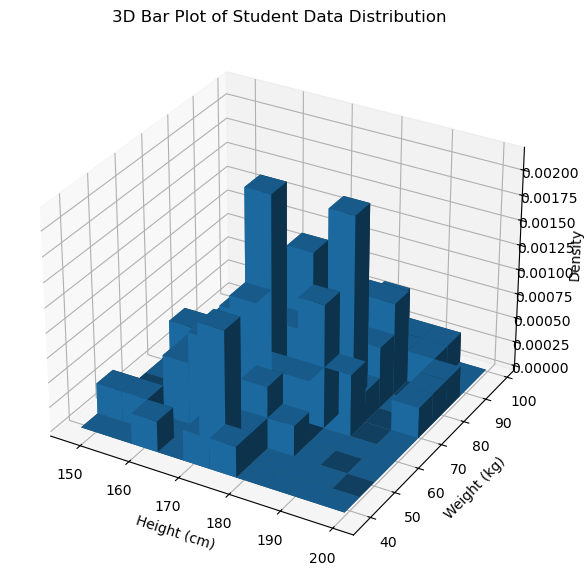

In [6]:
# --- 2. 3D Bar Column Plot ---

# Create a 2D histogram of the data
hist, xedges, yedges = np.histogram2d(height, weight, bins=10, density=True)

# Construct the x, y positions for the bars from the bin centers
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5 * (xedges[1] - xedges[0]), yedges[:-1] + 0.5 * (yedges[1] - yedges[0]))

xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = 0

# Construct the bar sizes (width, depth, and height)
dx = (xedges[1] - xedges[0]) * np.ones_like(zpos)
dy = (yedges[1] - yedges[0]) * np.ones_like(zpos)
dz = hist.flatten()

# Create a new figure and 3D axes for the bar plot
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')
ax2.set_title("3D Bar Plot of Student Data Distribution")
ax2.set_xlabel("Height (cm)")
ax2.set_ylabel("Weight (kg)")
ax2.set_zlabel("Density")
plt.show()